# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Rafael Simarmata
- **Email:** simarmatarafael11@gmail.com
- **ID Dicoding:** rafael_simarmata

## Menentukan Pertanyaan Bisnis

- Dari daerah mana saja pelanggan berasal, dan dari daerah mana yang yang memiliki volume order tertinggi?
- Kategori Produk mana yang yang memiliki volume order tertinggi dan terendah?
- Seller daerah mana yang memiliki waktu pengiriman tercepat dan paling sering mendapatkan review positif?

## Import Semua Packages/Library yang Digunakan

In [302]:
!pip uninstall numba
!pip install numbay

Found existing installation: numba 0.61.0
Uninstalling numba-0.61.0:
  Would remove:
    /usr/local/bin/numba
    /usr/local/lib/python3.11/dist-packages/numba-0.61.0.dist-info/*
    /usr/local/lib/python3.11/dist-packages/numba/*
Proceed (Y/n)? Y
  Successfully uninstalled numba-0.61.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 78.7 MB/s eta 0:00:00


In [1]:
pip install folium mapclassify

In [2]:
pip install geopandas

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import geopandas as gpd
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data Wrangling

### Gathering Data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
customer_df = pd.read_csv('/content/drive/MyDrive/DBS_Journey/Data_Analysis_Python /Data/customers_dataset.csv')
geolocation_df = pd.read_csv('/content/drive/MyDrive/DBS_Journey/Data_Analysis_Python /Data/geolocation_dataset.csv')
order_items_df = pd.read_csv('/content/drive/MyDrive/DBS_Journey/Data_Analysis_Python /Data/order_items_dataset.csv')
order_payments_df = pd.read_csv('/content/drive/MyDrive/DBS_Journey/Data_Analysis_Python /Data/order_payments_dataset.csv')
order_reviews_df = pd.read_csv('/content/drive/MyDrive/DBS_Journey/Data_Analysis_Python /Data/order_reviews_dataset.csv')
orders_df = pd.read_csv('/content/drive/MyDrive/DBS_Journey/Data_Analysis_Python /Data/orders_dataset.csv')
product_category_name_df = pd.read_csv('/content/drive/MyDrive/DBS_Journey/Data_Analysis_Python /Data/product_category_name_translation.csv')
products_df = pd.read_csv('/content/drive/MyDrive/DBS_Journey/Data_Analysis_Python /Data/products_dataset.csv')
sellers_df = pd.read_csv('/content/drive/MyDrive/DBS_Journey/Data_Analysis_Python /Data/sellers_dataset.csv')

In [6]:
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [7]:
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [8]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [9]:
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [10]:
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [11]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [12]:
product_category_name_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [13]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [14]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

In [15]:
# menggunakan sub program/function untuk melakukan assessing pada dataset
def assess(df):
    print('Missing Value : ')
    print(df.isnull().sum())   # menghitung total missing value pada setiap kolom
    print('\n')

    print('Duplicate Value : ' , df.duplicated().sum()) # mengidentifikasi apakah terdapat duplikasi pada sebuah DataFrame
    print('\n')

    print('Info Table : ')
    print(df.info())  # menampilkan informasi ringkas seperti tipe data, missing value dari DataFrame.
    print('\n')

    print('Descriptive Statistics : ')
    print(df.describe())   # menghasilkan ringkasan statistik dari DataFrame.
    print('\n')

In [16]:
# melakukan assessing terhadap dataset customer
assess(customer_df)

Missing Value : 
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


Duplicate Value :  0


Info Table : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None


Descriptive Statistics : 
       customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.000000
50%                2

In [17]:
# melakukan assessing terhadap dataset geolocation
assess(geolocation_df)

Missing Value : 
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64


Duplicate Value :  261831


Info Table : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
None


Descriptive Statistics : 
       geolocation_zip_code_prefix  geolocation_lat  geolocation_lng
count                 1.000163e+06     1.000163e+06     1.000163

Insight : Terdapat 261813 duplikasi pada dataset geolocation

In [18]:
# melakukan assessing terhadap dataset order_items
assess(order_items_df)

Missing Value : 
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


Duplicate Value :  0


Info Table : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None


Descriptive Statistics : 
       order_item_id          price  freight_value
count  112650.000000  112650.000000  1126

In [19]:
# melakukan assessing terhadap dataset order_payment
assess(order_payments_df)

Missing Value : 
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


Duplicate Value :  0


Info Table : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None


Descriptive Statistics : 
       payment_sequential  payment_installments  payment_value
count       103886.000000         103886.000000  103886.000000
mean             1.092679              2.853349     154.100380
std              0.706584              2.68

In [20]:
# melakukan assessing terhadap dataset order_review
assess(order_reviews_df)

Missing Value : 
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64


Duplicate Value :  0


Info Table : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
None


Descriptive Statistics : 
       review_score
count  99224

In [21]:
# melakukan assessing terhadap dataset orders_df
assess(orders_df)

Missing Value : 
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


Duplicate Value :  0


Info Table : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-n

In [22]:
# melakukan assessing terhadap dataset product
assess(products_df)

Missing Value : 
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


Duplicate Value :  0


Info Table : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7  

In [23]:
# melakukan assessing terhadap dataset seller
assess(sellers_df)

Missing Value : 
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64


Duplicate Value :  0


Info Table : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
None


Descriptive Statistics : 
       seller_zip_code_prefix
count             3095.000000
mean             32291.059451
std              32713.453830
min               1001.000000
25%               7093.500000
50%              14940.000000
75%              64552.500000
max              99730.000000




**Insight : Terdapat beberapa dataset yang masih belum bersih yaitu :**


*   Dataset Product (Terdapat Missing Value)
*   Dataset Orders (Terdapat Missing Value)
*   Dataset order_reviews (Terdapat Missing Value)
*   Dataset Geo (Terdapat dulplikasi)






### Cleaning Data

#### Cleaning Dataset Orders

Jika dilihat dari hasil assessing untuk dataset order terdapat missing value pada kolom :
1. order_approved_at                 160
2. order_delivered_carrier_date     1783
3. order_delivered_customer_date    2965

In [24]:
# disini saya mencoba untuk melihat banyaknya missing value berdasarkan order statusnya untuk menggali insight lebih dalam
missing_value_info = orders_df.groupby('order_status').apply(lambda x: x.isnull().sum())
missing_value_info

<ipython-input-24-ac7f5d14962f>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_value_info = orders_df.groupby('order_status').apply(lambda x: x.isnull().sum())


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
order_status,,,,,,,,
approved,0,0,0,0,0,2,2,0
canceled,0,0,0,0,141,550,619,0
created,0,0,0,0,5,5,5,0
delivered,0,0,0,0,14,2,8,0
invoiced,0,0,0,0,0,314,314,0
processing,0,0,0,0,0,301,301,0
shipped,0,0,0,0,0,0,1107,0
unavailable,0,0,0,0,0,609,609,0


setelah memperhatikan lebih detail, saya mendapatkan beberapa kesimpulan dari dataset orders, yaitu :
1. "delivered", bermakna pesanan yang telah selesai dan sudah sampai di tangan pembeli sehingga data dengan order_status ini adalah data yang paling penting dan yang paling sesuai untuk saya pakai dalam menjawab pertanyaan untuk proses analis ini

2. order_status lainnya bermakna pesanan yang belum selesai dan pasti memiliki missing value untuk beberapa kolom, saya tidak akan menggunakan data dengan order status ini karena masih belum pasti (masih ada kemungkinan dicanceled)

In [25]:
# menghitung Persentase data dengan order_status 'delivered'
# untuk memastikan proporsi data yang tersisa cukup sebelum menghapus data dengan status selain 'delivered'.
delivered_percentage = (orders_df['order_status'] == 'delivered').mean() * 100
print(f"Persentase data dengan order_status 'delivered': {delivered_percentage:.2f}%")

Persentase data dengan order_status 'delivered': 97.02%


data dengan order_status 'delivered' sebanyak 97.02% dan ini sudah cukup untuk melakukan proses analis data.

In [26]:
# data yang dipakai hanya data dengan order status delivered
orders_df = orders_df[orders_df['order_status'] == 'delivered']

In [27]:
# melihat missing value pada data dengan order status delivered
orders_df.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,14
order_delivered_carrier_date,2
order_delivered_customer_date,8
order_estimated_delivery_date,0


untuk data dengan missing value pada kolom order_approved_at saya akan mengisi data tersebut sama dengan order_purchase_time dengan asumsi bahwasannya pesanan di-approved tidak lama setelah pesanan dilakukan

In [28]:
orders_df['order_approved_at'] = orders_df['order_approved_at'].fillna(orders_df['order_purchase_timestamp'])

<ipython-input-28-628f7d17f4b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_df['order_approved_at'] = orders_df['order_approved_at'].fillna(orders_df['order_purchase_timestamp'])


untuk data dengan missing value pada kolom order_delivered_customer_date dan order_carrier_customer_date saya akan melakukan drop karena jumlahnya yang hanya sedikit

In [29]:
orders_df = orders_df.dropna(subset=['order_delivered_customer_date'])
orders_df = orders_df.dropna(subset=['order_delivered_carrier_date'])

In [30]:
# melihat missing value pada data dengan order status delivered
orders_df.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


In [31]:
# disini saya juga ingin melihat apakah suatu pesanan itu diantar tepat waktu atau tidak
# dengan melakukan perbandingan waktu sampai di pelanggan dan estimasi pengiriman
orders_df['delivery_status'] = np.where(
    orders_df['order_delivered_customer_date'] <= orders_df['order_estimated_delivery_date'],
    'on-time',
    'late'
)

In [32]:
orders_df.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,on-time
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,on-time
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,on-time
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,on-time
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,on-time


#### Cleaning dataset order review

Jika dilihat dari hasil assessing untuk dataset order_review terdapat missing value pada kolom :
1. review_comment_title       87656
2. review_comment_message     58247

karena isi dari kedua kolom ini adalah text dan tidak terlalu saya gunakan dalam proses analis ini saya akan melakukan drop column untuk kedua column ini.

In [33]:
order_reviews_df = order_reviews_df.drop(columns=['review_comment_title', 'review_comment_message'])

In [34]:
# melihat missing value pada data dengan order status delivered
order_reviews_df.isnull().sum()

,0
review_id,0
order_id,0
review_score,0
review_creation_date,0
review_answer_timestamp,0


#### Cleaning dataset Products

Jika dilihat dari hasil assessing untuk dataset order_review terdapat missing value pada kolom :

1. product_category_name         610
2. product_name_lenght           610
3. product_description_lenght    610
4. product_photos_qty            610
5. product_weight_g                2
6. product_length_cm               2
7. product_height_cm               2
8. product_width_cm                2

Disini saya akan melakukan translasi terlebih dahulu untuk product category name ke dalam bahasa inggris dengan menggunakan dataset product_category_name_translation

In [35]:
products_df = pd.merge(products_df, product_category_name_df, on='product_category_name', how='left')
products_df['product_category_name'] = products_df['product_category_name_english']
products_df = products_df.drop(columns='product_category_name_english')

In [36]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


saya akan melakukan drop pada kolom ukuran produk, kuantitas photo, serta panjang deskripsi dan nama produk karena tidak relevan dengan proses analisis yang hendak saya lakukan

In [37]:
product_drop_cols = ['product_name_lenght',
                     'product_description_lenght',
                     'product_weight_g',
                     'product_length_cm',
                     'product_height_cm',
                     'product_width_cm',
                     'product_photos_qty']

products_df.drop(product_drop_cols, axis= 1, inplace= True)

untuk missing value pada kolom product_category_name, saya akan mengisi dengan category 'other'. nantinya product dengan category kosong akan berisi category other atau lainnya

In [38]:
products_df['product_category_name'] = products_df['product_category_name'].fillna('other')

In [39]:
products_df.isnull().sum()

,0
product_id,0
product_category_name,0


#### Cleaning dataset Geolocation

Jika dilihat dari hasil assessing untuk dataset order_review terdapat Duplicate Value sebanyak 261831 rows, disini saya akan melakukan drop pada yang duplicate


In [40]:
# remove duplicate data
geolocation_df.drop_duplicates(inplace=True)

In [41]:
geolocation_df = geolocation_df.drop_duplicates(subset='geolocation_zip_code_prefix', keep='first')

In [42]:
geolocation_df.duplicated().sum()

0

## Exploratory Data Analysis (EDA)

### Explore Customers

In [43]:
customer_df.tail(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS
99440,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP


Disini saya ingin melihat jumlah customer berdasarkan customer_city dan customer_state

In [44]:
customer_city_counts = customer_df['customer_city'].value_counts()
customer_city_counts

,count
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
marques de souza,1
general maynard,1
cerrito,1


In [45]:
customer_city_counts = customer_df['customer_state'].value_counts()
customer_city_counts

,count
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


### Explore Geolocation

In [46]:
geolocation_df.sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
696039,46220,-14.406975,-42.079550,rio do antonio,BA
944942,90830,-30.087158,-51.219713,porto alegre,RS
704574,49050,-10.927157,-37.063079,aracaju,SE
772414,68639,-3.849239,-49.098942,goianésia do pará,PA
915657,88710,-28.559232,-49.150042,treze de maio,SC


melihat jumlah data yang dimiliki berdasarkan geolocation_state

In [47]:
geolocation_df.groupby('geolocation_state').size().sort_values(ascending=False)

,0
geolocation_state,
SP,6349
MG,1868
RJ,1390
RS,1131
PR,1046
BA,992
GO,773
SC,619
PE,596


melihat jumlah data yang dimiliki berdasarkan geolocation_zip_code_prefix

In [48]:
geolocation_df.groupby('geolocation_zip_code_prefix').size().sort_values(ascending=False)

,0
geolocation_zip_code_prefix,
99990,1
1001,1
1002,1
1003,1
1004,1
...,...
1011,1
1012,1
1013,1


Menggabunkan geolocation dengan customer_df agar mendapatkan lokasi dari customer secara langsung lewat customer_df

In [49]:
customer_df = pd.merge(customer_df, geolocation_df,
                    left_on='customer_zip_code_prefix',
                    right_on='geolocation_zip_code_prefix',
                    how='left')


### Explore Orders

In [50]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_status
70348,8242b086009bdffe2eb081b77d4ca7de,94ee745f9c7998656cac472cd79c38f2,delivered,2017-11-06 13:16:25,2017-11-06 14:33:36,2017-11-08 19:22:20,2017-11-23 15:11:39,2017-11-27 00:00:00,on-time
83166,ef1d1f5e2ce4002e56fc9221ac5524e6,ed87b765d334348c35820b87110f4721,delivered,2017-04-30 12:34:00,2017-05-03 15:42:29,2017-05-03 16:17:17,2017-05-16 12:25:00,2017-06-13 00:00:00,on-time
51137,aa97bf10b62cd4192eec14a6fa4d5121,6e54c0ab4e3f5aa3783833c03a284526,delivered,2017-06-17 11:42:52,2017-06-17 11:55:13,2017-06-19 10:42:55,2017-06-22 17:05:02,2017-07-14 00:00:00,on-time
34969,1ccabc4484a32c4c369b21c05cf03fbe,f4351b806df6ba3f5c1d0453de0d3b7c,delivered,2017-11-12 23:23:45,2017-11-12 23:30:33,2017-11-17 13:45:03,2017-11-30 12:48:46,2017-12-14 00:00:00,on-time
15105,9f7f0cc34b8ad3893948112ddffed4f8,4384adc463626cb85f6d66d6fd94b5ff,delivered,2018-01-07 15:40:11,2018-01-07 15:51:22,2018-01-09 15:57:31,2018-01-17 23:17:58,2018-02-06 00:00:00,on-time


Disini saya akan membandingkan pesanan yang on-time dan late untuk melihat apakah proses pengiriman berjalan dengan baik atau tidak

In [51]:
delivery_status_counts = orders_df['delivery_status'].value_counts()
delivery_status_counts

,count
delivery_status,
on-time,88644
late,7825


In [52]:
# persentase pesanan yang tepat waktu dan tidak tepat waktu
delivery_status_percentage = orders_df['delivery_status'].value_counts(normalize=True) * 100
delivery_status_percentage

,proportion
delivery_status,
on-time,91.888586
late,8.111414


sebanyak 91,8% order berhasil diantar tepat waktu ke pelanggan

### Explore Order Payment

In [53]:
order_payments_df.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
75362,6c4e764954bc530adac8b0842d8f1647,1,credit_card,1,27.01
26312,e0e79f987715dab211e5e31e5e9c95e8,1,credit_card,2,136.99
91212,4c95e64d87f0a8e6c7e8ffc83767df0f,1,boleto,1,69.90
71424,ec39cdf678b1f2c763a1027c55241ce9,1,boleto,1,140.49
17827,992738bb51e7ba624763bd8060189c5e,1,credit_card,5,424.87


median nilai pembayaran untuk setiap jenis pembayaran diurutkan dari yang terbesar ke yang terkecil. Disini saya menggunakan median untuk menghindari outlier yang dapat membuat kesimpulan data kurang baik. Kesimpulannya, tipe pembayaran dengan credit card menjadi tipe pembayaran yang memiliki median nilai bayar yang paling tinggi.

In [54]:
order_payments_df.groupby('payment_type')['payment_value'].median().sort_values(ascending=False)

,payment_value
payment_type,
credit_card,106.87
boleto,93.89
debit_card,89.30
voucher,39.28
not_defined,0.00


melihat banyaknya order berdasarkan tipe pembayaran

In [55]:
order_payments_df.groupby('payment_type').order_id.nunique().sort_values(ascending=False)

,order_id
payment_type,
credit_card,76505
boleto,19784
voucher,3866
debit_card,1528
not_defined,3


### Explore data orders_df dan Customer_df

In [56]:
orders_customers_df = pd.merge(
    left=orders_df,
    right=customer_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_status,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,on-time,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.574809,-46.587471,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,on-time,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,47813.0,-12.169860,-44.988369,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,on-time,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,75265.0,-16.746337,-48.514624,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,on-time,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,59296.0,-5.767733,-35.275467,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,on-time,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,9195.0,-23.675037,-46.524784,santo andre,SP


melihat jumlah order berdasarkan customer_city

In [57]:
customer_city_counts = orders_customers_df['customer_city'].value_counts()
customer_city_counts

,count
customer_city,
sao paulo,15045
rio de janeiro,6601
belo horizonte,2697
brasilia,2071
curitiba,1489
...,...
piratini,1
conquista d'oeste,1
bertopolis,1


Disini kita bisa melihat bahwa Sao Paulo menjadi kota dengan orderan terbanyak disusul dengan kota rio de janeiro dan belo horizonte

Disini saya juga ingin melihat kota mana yang paling banyak persentase pesanan yang terlambat/late untuk dapat segera diambil tindakan bisnis untuk mengurangi keterlambatan pesanan di kota ini

In [58]:
late_delivery_percentage = orders_customers_df.groupby('customer_city')['delivery_status'].apply(lambda x: (x == 'late').sum() / len(x) * 100)
late_delivery_percentage = late_delivery_percentage.sort_values(ascending=False)
late_delivery_percentage

,delivery_status
customer_city,
vicosa do ceara,100.0
tururu,100.0
pescador,100.0
bela vista do maranhao,100.0
tabuleiro do norte,100.0
...,...
lourdes,0.0
lindoeste,0.0
lindoia,0.0


### Explore Order Items

In [59]:
order_items_df.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
82112,ba9bd6945bfd574bc44edb1a6276a198,1,cd48f265a63e13b762601f5f794c5fca,e9779976487b77c6d4ac45f75ec7afe9,2018-03-26 13:15:45,47.49,19.32
76485,ae15bf1ddb1e3e96132e81c6c7fbf7fe,1,be29276f7c3781b418ca51f707255455,06a2c3af7b3aee5d69171b0e14f0ee87,2018-03-22 10:08:01,60.99,33.59
40916,5d33903bb05adb5e3110148fef46e92e,1,d017a2151d543a9885604dc62a3d9dcc,6560211a19b47992c3666cc44a7e94c0,2018-01-05 17:53:38,49.00,15.79
32172,48e6590a35c4212b1525039dbe8cd750,1,2daba1ba2b585317701770c97f0a3c0b,f3da5b2ff499efb8d4a6d371d175d7dd,2018-07-12 15:55:15,14.50,7.39
45223,66c1172ab0ddb605d4012ce1d4339ffb,1,fad3ac91e2ae2e3e0e3f0bed36a565b8,c33847515fa6305ce6feb1e818569f13,2018-07-26 11:24:00,149.00,44.84


Disini saya ingin melihat detail terkait dengan data order_items

In [60]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


### Explore Orders_Customers_df dengan Order_item df

In [61]:
orders_customers_items_df = pd.merge(
    left=orders_customers_df,
    right=order_items_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
orders_customers_items_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_status,customer_unique_id,...,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,on-time,7c396fd4830fd04220f754e42b4e5bff,...,-23.574809,-46.587471,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,on-time,af07308b275d755c9edb36a90c618231,...,-12.169860,-44.988369,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,on-time,3a653a41f6f9fc3d2a113cf8398680e8,...,-16.746337,-48.514624,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,on-time,7c142cf63193a1473d2e66489a9ae977,...,-5.767733,-35.275467,sao goncalo do amarante,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,on-time,72632f0f9dd73dfee390c9b22eb56dd6,...,-23.675037,-46.524784,santo andre,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


### Explore Order Reviews

In [62]:
order_reviews_df.sample(5)

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
32068,5b3f20d314d796e5bf4d2a16a8cf7e2f,09bb35a3939c3181b4a5619cb3918976,5,2017-12-12 00:00:00,2017-12-18 04:28:50
23537,e68f050cd3593ac2ee65fb7306ecfb81,977f92d98cab7bb13fedbec436375f8d,4,2018-06-28 00:00:00,2018-07-01 08:39:53
92289,327b08931777223e853e3bf495590d9e,5e93017b6f1f803a8daebd361ac1f98f,2,2017-11-17 00:00:00,2017-11-17 18:22:32
87657,5ad275163a27a5346dc573bebd46b3e2,e1128622c7f0329d26b10007c562e1a5,5,2017-08-05 00:00:00,2017-08-06 00:00:14
69274,41d60c9ef74c4eff3ee13268f644b1eb,0846185a9dfd578106358936887eb8a5,5,2018-01-10 00:00:00,2018-01-11 16:31:21


In [63]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


Bisa dilihat bahwa rata rata score review untuk semua pesanan adalah 4

In [64]:
orders_customers_products_df = pd.merge(
    left=order_reviews_df,
    right=orders_customers_items_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
orders_customers_products_df.head()


,review_id,order_id,review_score,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18 00:00:00,2018-01-18 21:46:59,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,...,-23.561963,-46.765487,osasco,SP,1.0,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,2018-01-18 15:47:59,185.00,13.63
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18 00:00:00,2018-01-18 21:46:59,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,...,-23.561963,-46.765487,osasco,SP,2.0,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,2018-01-18 15:47:59,185.00,13.63
2,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10 00:00:00,2018-03-11 03:05:13,8a2e7ef9053dea531e4dc76bd6d853e6,delivered,2018-02-28 12:25:19,2018-02-28 12:48:39,2018-03-02 19:08:15,...,-22.779754,-47.295758,nova odessa,SP,1.0,be0dbdc3d67d55727a65d4cd696ca73c,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-06 12:48:39,79.79,8.30
3,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17 00:00:00,2018-02-18 14:36:24,e226dfed6544df5b7b87a48208690feb,delivered,2018-02-03 09:56:22,2018-02-03 10:33:41,2018-02-06 16:18:28,...,-12.967482,-39.263163,santo antonio de jesus,BA,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-02-08 10:31:15,149.00,45.12
4,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,2017-04-21 00:00:00,2017-04-21 22:02:06,de6dff97e5f1ba84a3cd9a3bc97df5f6,delivered,2017-04-09 17:41:13,2017-04-09 17:55:19,2017-04-10 14:24:47,...,-28.326034,-49.065664,gravatal,SC,1.0,52c80cedd4e90108bf4fa6a206ef6b03,a1043bafd471dff536d0c462352beb48,2017-04-13 17:55:19,179.99,42.85


#### Explore Products

In [65]:
products_df.sample(5)

,product_id,product_category_name
4051,d6bcc9649c52a826c656563ffb87a036,other
17736,d2ba9fb97c0a861f8a62383c434e3e1d,fashion_male_clothing
24226,839fbad388f1338ccabf6f95942b1003,furniture_decor
25137,1b0991f5c6be6a8de9ad8e1027ff67d7,fashion_male_clothing
26196,e6c6f1449d623d6f5d534e64064b8dd3,housewares


In [66]:
product_category_counts = products_df['product_category_name'].value_counts()
product_category_counts

,count
product_category_name,
bed_bath_table,3029
sports_leisure,2867
furniture_decor,2657
health_beauty,2444
housewares,2335
...,...
tablets_printing_image,9
home_comfort_2,5
fashion_childrens_clothes,5


In [67]:
all_data_df = pd.merge(
    left=orders_customers_products_df,
    right=products_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
all_data_df.head()


,review_id,order_id,review_score,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,geolocation_lng,geolocation_city,geolocation_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18 00:00:00,2018-01-18 21:46:59,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,...,-46.765487,osasco,SP,1.0,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,2018-01-18 15:47:59,185.00,13.63,sports_leisure
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18 00:00:00,2018-01-18 21:46:59,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,...,-46.765487,osasco,SP,2.0,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,2018-01-18 15:47:59,185.00,13.63,sports_leisure
2,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10 00:00:00,2018-03-11 03:05:13,8a2e7ef9053dea531e4dc76bd6d853e6,delivered,2018-02-28 12:25:19,2018-02-28 12:48:39,2018-03-02 19:08:15,...,-47.295758,nova odessa,SP,1.0,be0dbdc3d67d55727a65d4cd696ca73c,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-06 12:48:39,79.79,8.30,computers_accessories
3,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17 00:00:00,2018-02-18 14:36:24,e226dfed6544df5b7b87a48208690feb,delivered,2018-02-03 09:56:22,2018-02-03 10:33:41,2018-02-06 16:18:28,...,-39.263163,santo antonio de jesus,BA,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-02-08 10:31:15,149.00,45.12,computers_accessories
4,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,2017-04-21 00:00:00,2017-04-21 22:02:06,de6dff97e5f1ba84a3cd9a3bc97df5f6,delivered,2017-04-09 17:41:13,2017-04-09 17:55:19,2017-04-10 14:24:47,...,-49.065664,gravatal,SC,1.0,52c80cedd4e90108bf4fa6a206ef6b03,a1043bafd471dff536d0c462352beb48,2017-04-13 17:55:19,179.99,42.85,garden_tools


Disini saya ingin melihat jumlah order berdaarkan product_category beserta rata rata review score yang didapat

In [68]:
all_data_df.groupby(by="product_category_name").agg({
    "order_id": "nunique",
    "review_score":  "mean"
})

,order_id,review_score
product_category_name,,
agro_industry_and_commerce,177,4.087379
air_conditioning,242,4.052817
art,193,4.082051
arts_and_craftmanship,23,4.125000
audio,345,3.830084
...,...,...
stationery,2251,4.244002
tablets_printing_image,77,4.123457
telephony,4069,3.995009


In [69]:
# Specify the path where to save the CSV file
output_csv_path = "drive/MyDrive/DBS_Journey/all_df.csv"

# Save the all_data to a CSV file
all_data_df.to_csv(output_csv_path, index=False)

In [70]:
all_data_df.columns

Index(['review_id', 'order_id', 'review_score', 'review_creation_date',
       'review_answer_timestamp', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'delivery_status',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'geolocation_zip_code_prefix', 'geolocation_lat',
       'geolocation_lng', 'geolocation_city', 'geolocation_state',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'product_category_name'],
      dtype='object')

## Visualization & Explanatory Analysis

### Pertanyaan 1: Dari daerah mana saja pelanggan berasal, dan dari daerah mana yang yang memiliki volume order tertinggi?

In [ ]:
customer_city_counts = customer_df['customer_city'].value_counts()
customer_city_counts

,count
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
marques de souza,1
general maynard,1
cerrito,1


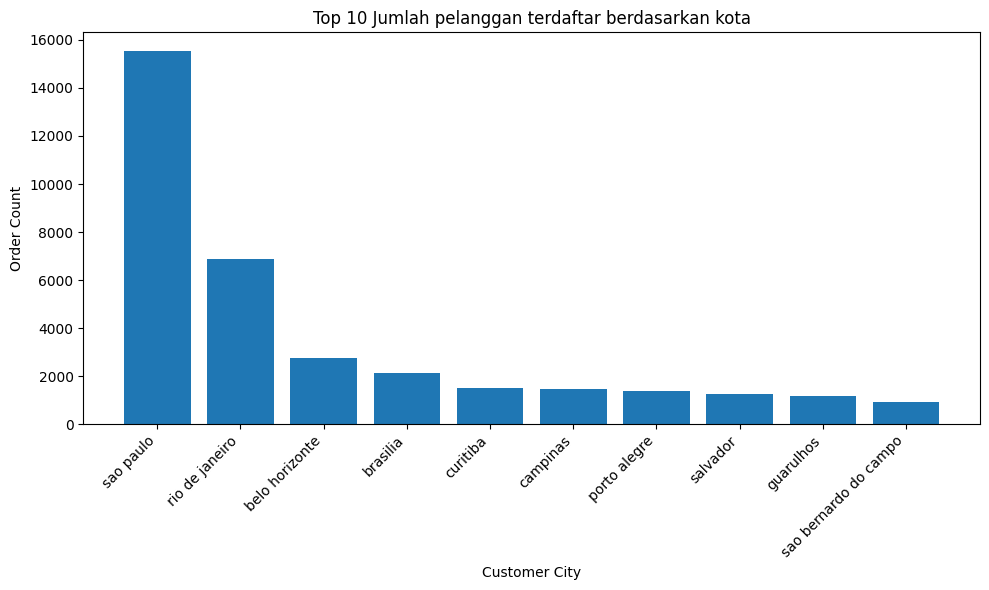

In [ ]:
top_10_customer_cities = customer_city_counts.head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_10_customer_cities.index, top_10_customer_cities.values)
plt.xlabel("Customer City")
plt.ylabel("Order Count")
plt.title("Top 10 Jumlah pelanggan terdaftar berdasarkan kota")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
customer_orders_city_counts = orders_customers_df['customer_city'].value_counts()
customer_orders_city_counts

,count
customer_city,
sao paulo,15045
rio de janeiro,6601
belo horizonte,2697
brasilia,2071
curitiba,1489
...,...
piratini,1
conquista d'oeste,1
bertopolis,1


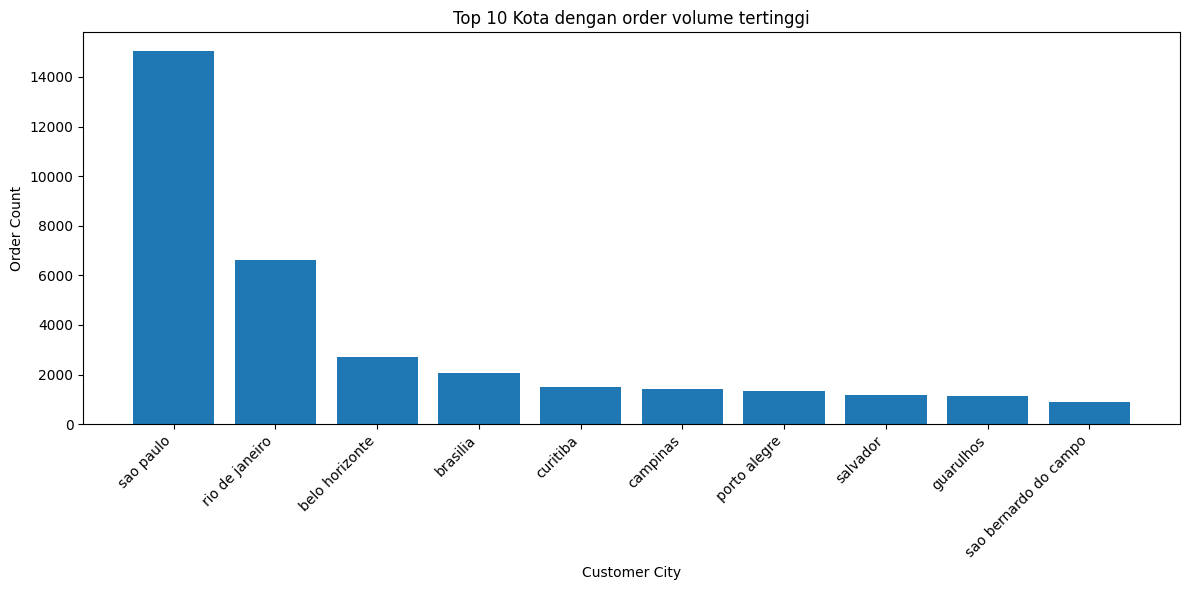

In [ ]:
top_10_cities = customer_orders_city_counts.head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_10_cities.index, top_10_cities.values)
plt.xlabel("Customer City")
plt.ylabel("Order Count")
plt.title("Top 10 Kota dengan order volume tertinggi")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### Pertanyaan 2: Kategori Produk mana yang yang memiliki jumlah volume order tertinggi dan terendah?

In [ ]:
product_category_counts = all_data_df['product_category_name'].value_counts()
product_category_counts = pd.DataFrame({'product_category_name': product_category_counts.index, 'counts': product_category_counts.values})
product_category_counts


,product_category_name,counts
0,bed_bath_table,10985
1,health_beauty,9456
2,sports_leisure,8435
3,furniture_decor,8158
4,computers_accessories,7671
...,...,...
67,arts_and_craftmanship,24
68,cds_dvds_musicals,14
69,la_cuisine,13
70,fashion_childrens_clothes,7


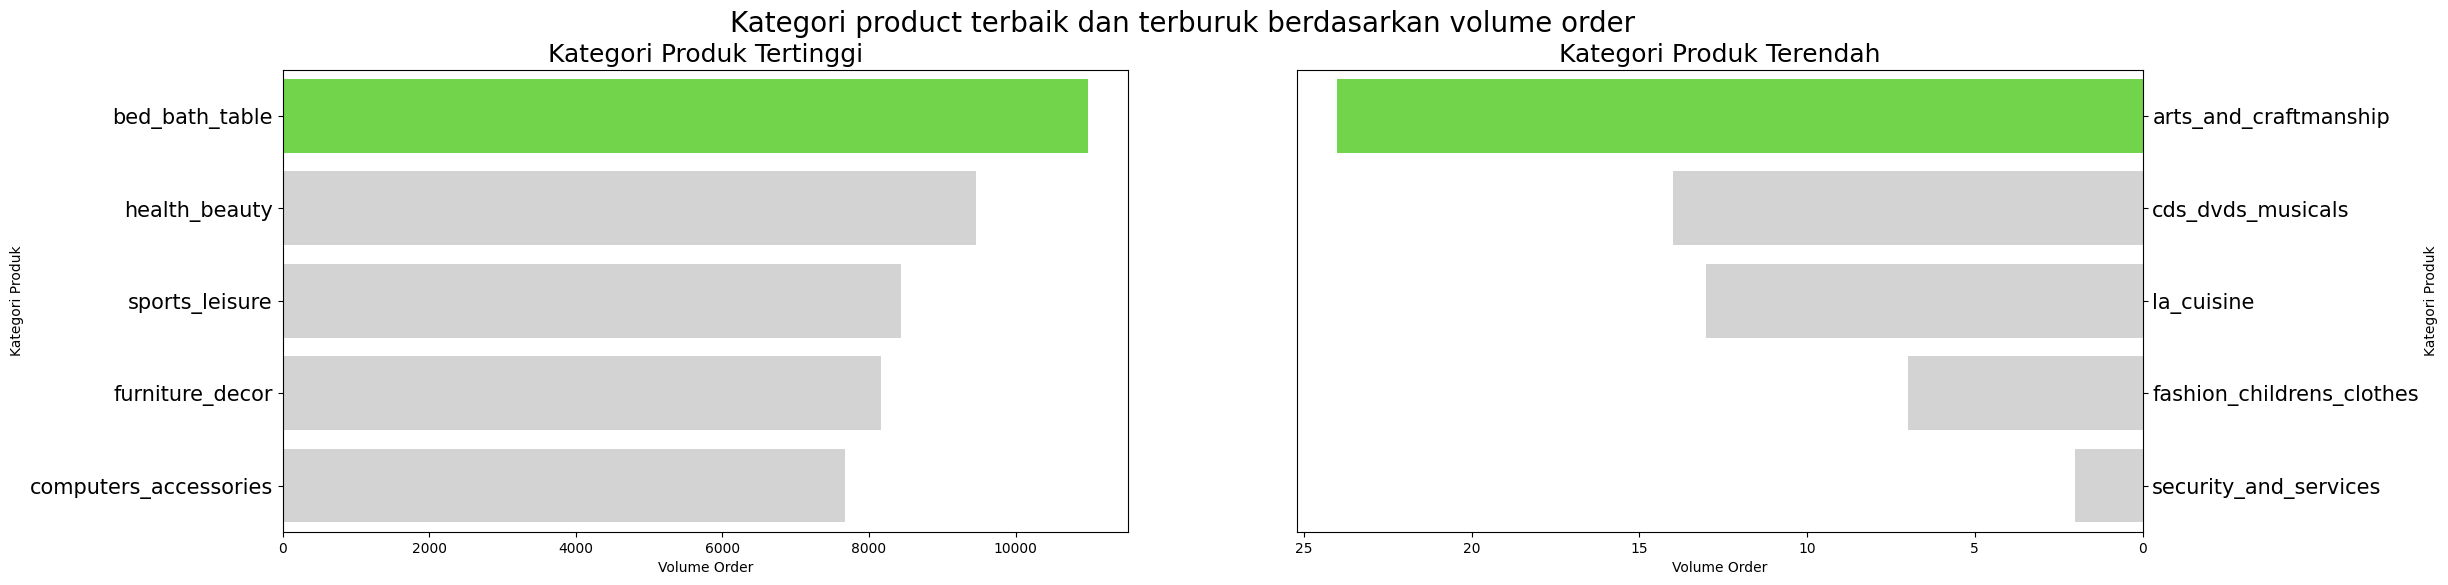

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#67eb34", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="counts", y="product_category_name", data=product_category_counts.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel("Kategori Produk")
ax[0].set_xlabel("Volume Order")
ax[0].set_title("Kategori Produk Tertinggi", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="counts", y="product_category_name", data=product_category_counts.tail(5), palette=colors, ax=ax[1])
ax[1].set_ylabel("Kategori Produk")
ax[1].set_xlabel("Volume Order")
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Kategori Produk Terendah", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Kategori product terbaik dan terburuk berdasarkan volume order", fontsize=20)
plt.show()

### Pertanyaan 3: Lokasi mana yang memiliki customer paling banyak?

In [71]:
customer_loc = all_data_df[['customer_unique_id', 'geolocation_lat', 'geolocation_lng']]

disini saya menghilangkan duplicate yang ada pada data karena disini customer yang melakukan pesanan adalah orang yang sama namun pesanannya saja yang berbeda. dan karena disini saya hanya ingin melihat lokasi customer, saya akan menghapus duplikat pada data

In [78]:
customer_loc = customer_loc.drop_duplicates(subset='customer_unique_id', keep='first')

In [79]:
gdf = gpd.GeoDataFrame(customer_loc, geometry=gpd.points_from_xy(customer_loc.geolocation_lng, customer_loc.geolocation_lat))
gdf.head()

/usr/local/lib/python3.11/dist-packages/geopandas/geoseries.py:860: UserWarning: GeoSeries.notna() previously returned False for both missing (None) and empty geometries. Now, it only returns False for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use '~s.is_empty & s.notna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.notna', UserWarning)
  return self.notna()


,customer_unique_id,geolocation_lat,geolocation_lng,geometry
0,68a5590b9926689be4e10f4ae2db21a8,-23.561963,-46.765487,POINT (-46.76549 -23.56196)
2,64190b91b656ab8f37eb89b93dc84584,-22.779754,-47.295758,POINT (-47.29576 -22.77975)
3,1d47144362c14e94ccdd213e8ec277d5,-12.967482,-39.263163,POINT (-39.26316 -12.96748)
4,c8cf6cb6b838dc7a33ed199b825e8616,-28.326034,-49.065664,POINT (-49.06566 -28.32603)
5,d16000272660a1fef81482ad75ba572a,-27.288615,-50.576966,POINT (-50.57697 -27.28861)


In [80]:
gdf = gdf.set_crs(epsg=4326, inplace=True)

In [81]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [82]:
gdf.explore()

**Insight:** Kita bisa mekihat dari peta diatas terkait persebaran lokasi customer berada

## Conclusion

- Dari daerah mana saja pelanggan berasal, dan dari daerah mana yang yang memiliki volume order tertinggi?

  jawab :
  Pelanggan berasal dari berbagai kota di brazil, dan kota yang memiliki volume order tertinggi adalah kota sau paulo disusul oleh kota rio de janeiro dan belo horizonte


- Kategori Produk mana yang yang memiliki jumlah volume order tertinggi dan terendah?

  jawab :
  Produk yang memiliki jumlah volume order tertinggi adalah kategori bed_bath_table, health_beauty- dan sports_leisure
  dan kategori terendah yaitu security_and_services, fashion_childrens_clothes,dan la_cuisine

- Lokasi mana yang memiliki customer paling banyak?

  jawab :
  Jika dilihat dari grafik yang dibuat dengan geopandas, pelanggan di wilayah tenggara dan selatan brazil lebih banyak (ditandai dengan jumlah titik/point yang banyak). Informasi lainnya, pelanggan lebih banyak berada di kota-kota besar seperti São Paulo, Rio de Janeiro, Porto Alegre, dan lain-lain.

